# Accessing GW data

Boilerplate code

In [1]:
import numpy as np
from postcactus.simdir import SimDir
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
example_data = "./bns_example"
sd = SimDir(example_data)

GW data extracted using the Weyl scalar $\Psi_4$ can be accessed via sd.gwpsi4mp.

In [4]:
print sd.gwpsi4mp

Extraction radii = [50.0, 75.0, 100.0, 150.0, 200.0, 300.0, 400.0, 620.0]
Available components up to l=4

Extraction radius r_coord = 5.00000e+01
Available components up to l=4
Extraction radius r_coord = 7.50000e+01
Available components up to l=4
Extraction radius r_coord = 1.00000e+02
Available components up to l=4
Extraction radius r_coord = 1.50000e+02
Available components up to l=4
Extraction radius r_coord = 2.00000e+02
Available components up to l=4
Extraction radius r_coord = 3.00000e+02
Available components up to l=4
Extraction radius r_coord = 4.00000e+02
Available components up to l=4
Extraction radius r_coord = 6.20000e+02
Available components up to l=4


Each extraction radius is represented by a "detector" 

In [5]:
det1 = sd.gwpsi4mp.outer_det #shortcut for outmost extraction radius 
det2 = sd.gwpsi4mp[400.] # a bit further in

Obtain the raw $l=m=2$ multipole of $\Psi_4$ 

In [6]:
l,m = 2,2
p1 = det1.get_psi4(l,m)
p2 = det2.get_psi4(l,m)

Shift time by detector distance, scale signal to remove $1/d$ decay.

In [7]:
p1 = p1.shifted(-det1.dist)
p1.y = p1.y * det1.dist
p2 = p2.shifted(-det2.dist)
p2.y = p2.y * det2.dist

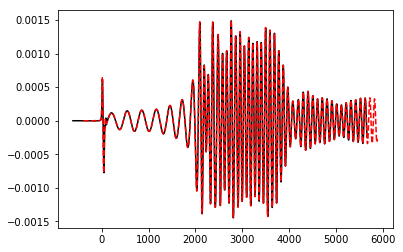

In [8]:
plt.plot(p1.t, p1.y.real, 'k-')
plt.plot(p2.t, p2.y.real, 'r--');


We use some tools to work with timeseries

In [9]:
from postcactus import timeseries

Resample both signals to common times and compute difference

In [10]:
cp1, cp2 = timeseries.sample_common([p1,p2])
res = np.abs(cp1.y-cp2.y) 
pmax = np.max(np.abs(p1.y))

Plotting difference normalized to maximimum

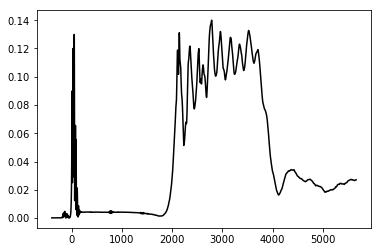

In [12]:
plt.plot(cp1.t, res/pmax, 'k-');

Pretty large, but we used a crude approximation for the time-shift.

We now compute the complex phase (un-wrapped) and the phase velocity (cutting off junk radiation)

In [13]:
phi = p1.cont_phase()
wi = phi.deriv(1).clipped(det1.dist)

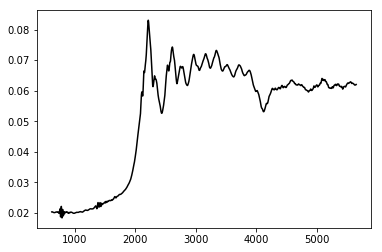

In [15]:
plt.plot(wi.t, -wi.y, 'k-');

To get strain, we use fixed frequency integration (FFI). The FFI cutoff angular velociy needs to be specified manually. To reduce boundary effects, we taper the signal using a Planck window function, with tapering width based on period corresponding to cutoff frequency. We also cut off the tapered parts in the final result.

In [16]:
ffi_wcut = 0.015
hp,hc = det1.get_strain(l,m,ffi_wcut, taper=True, cut=True)

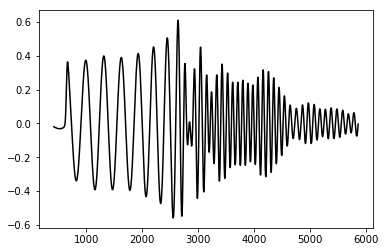

In [17]:
plt.plot(hp.t, hp.y, 'k-');

Now we compute the effective strain 
$\tilde{h}_e = \sqrt{\frac{1}{2} \left(\tilde{h}_p^2(f) + \tilde{h}_c^2\right)}$. 

In [18]:
fe,he = det1.get_eff_strain(l,m, ffi_wcut)

Note: this returns eff. strain multiplied by extraction radius.

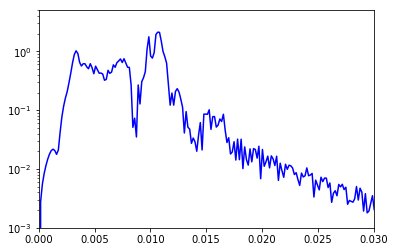

In [19]:
plt.semilogy(fe,he, 'b-')
plt.xlim(0,0.03)
plt.ylim(1e-3,5);